In [1]:
import os
import pickle as pkl

import pandas as pd

from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats

In [2]:
counts = pd.read_csv('Soybean_count_table_idp14.csv')
counts

,Geneid,Control_T14_R1,Control_T14_R2,Control_T14_R3,Control_T14_R4,Alternaria_T14_R1,Alternaria_T14_R2,Alternaria_T14_R3,Alternaria_T14_R4
0,LOC100808170,1,0,0,0,0,0,0,0
1,LOC102661143,1,5,2,0,2,1,0,2
2,LOC121174904,0,0,0,0,0,0,0,0
3,LOC106794262,0,0,0,0,0,0,0,0
4,LOC100781438,6,3,3,2,5,4,3,1
...,...,...,...,...,...,...,...,...,...
54527,I638_mgp007,0,0,0,0,0,0,0,0
54528,I638_mgp006,0,0,0,0,0,0,0,0
54529,I638_mgp005,0,0,0,0,0,0,0,0
54530,I638_mgp004,0,0,0,0,0,0,0,0


In [3]:
counts = counts.set_index('Geneid')
counts

,Control_T14_R1,Control_T14_R2,Control_T14_R3,Control_T14_R4,Alternaria_T14_R1,Alternaria_T14_R2,Alternaria_T14_R3,Alternaria_T14_R4
Geneid,,,,,,,,
LOC100808170,1,0,0,0,0,0,0,0
LOC102661143,1,5,2,0,2,1,0,2
LOC121174904,0,0,0,0,0,0,0,0
LOC106794262,0,0,0,0,0,0,0,0
LOC100781438,6,3,3,2,5,4,3,1
...,...,...,...,...,...,...,...,...
I638_mgp007,0,0,0,0,0,0,0,0
I638_mgp006,0,0,0,0,0,0,0,0
I638_mgp005,0,0,0,0,0,0,0,0


In [4]:
counts = counts[counts.sum(axis = 1) > 0]
counts

,Control_T14_R1,Control_T14_R2,Control_T14_R3,Control_T14_R4,Alternaria_T14_R1,Alternaria_T14_R2,Alternaria_T14_R3,Alternaria_T14_R4
Geneid,,,,,,,,
LOC100808170,1,0,0,0,0,0,0,0
LOC102661143,1,5,2,0,2,1,0,2
LOC100781438,6,3,3,2,5,4,3,1
LOC100788220,4,1,4,4,4,4,2,1
LOC100779643,2,6,7,1,7,10,11,1
...,...,...,...,...,...,...,...,...
I638_mgt016,0,0,0,0,1,0,0,0
I638_mgp018,1,0,3,2,3,0,1,3
I638_mgp014,0,0,0,0,0,0,0,1


In [5]:
counts = counts.T
counts

Geneid,LOC100808170,LOC102661143,LOC100781438,LOC100788220,LOC100779643,LOC100499919,LOC100792431,LOC100783065,LOC548054,LOC100795420,...,I638_mgp022,I638_mgp021,I638_mgp060,I638_mgp020,I638_mgp019,I638_mgt016,I638_mgp018,I638_mgp014,I638_mgp009,I638_mgp003
Control_T14_R1,1,1,6,4,2,7,7,2,25,3,...,0,2,0,0,0,0,1,0,0,1
Control_T14_R2,0,5,3,1,6,10,4,0,29,0,...,0,0,0,0,0,0,0,0,0,0
Control_T14_R3,0,2,3,4,7,8,10,0,40,3,...,0,0,0,0,0,0,3,0,1,0
Control_T14_R4,0,0,2,4,1,2,5,1,22,1,...,0,1,0,0,1,0,2,0,1,1
Alternaria_T14_R1,0,2,5,4,7,22,7,1,41,2,...,1,0,1,1,2,1,3,0,1,0
Alternaria_T14_R2,0,1,4,4,10,7,9,2,28,1,...,1,0,0,1,0,0,0,0,0,0
Alternaria_T14_R3,0,0,3,2,11,15,3,0,31,2,...,0,0,0,1,0,0,1,0,0,0
Alternaria_T14_R4,0,2,1,1,1,10,3,1,23,0,...,0,1,0,1,0,0,3,1,1,0


In [6]:
metadata = pd.DataFrame(zip(counts.index, ['C14','C14','C14','C14', 'AL14', 'AL14', 'AL14', 'AL14']),
                        columns = ['Sample', 'Condition'])

In [7]:
metadata = metadata.set_index('Sample')
metadata

,Condition
Sample,
Control_T14_R1,C14
Control_T14_R2,C14
Control_T14_R3,C14
Control_T14_R4,C14
Alternaria_T14_R1,AL14
Alternaria_T14_R2,AL14
Alternaria_T14_R3,AL14
Alternaria_T14_R4,AL14


In [8]:
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=counts,
    metadata=metadata,
    design_factors="Condition",
    refit_cooks=True,
    inference=inference,
)

In [9]:
dds

AnnData object with n_obs × n_vars = 8 × 33915
    obs: 'Condition'
    obsm: 'design_matrix'

In [10]:
dds.obs

,Condition
Sample,
Control_T14_R1,C14
Control_T14_R2,C14
Control_T14_R3,C14
Control_T14_R4,C14
Alternaria_T14_R1,AL14
Alternaria_T14_R2,AL14
Alternaria_T14_R3,AL14
Alternaria_T14_R4,AL14


In [11]:
dds.var

""
Geneid
LOC100808170
LOC102661143
LOC100781438
LOC100788220
LOC100779643
...
I638_mgt016
I638_mgp018
I638_mgp014


In [12]:
dds.X

array([[1, 1, 6, ..., 0, 0, 1],
       [0, 5, 3, ..., 0, 0, 0],
       [0, 2, 3, ..., 0, 1, 0],
       ...,
       [0, 1, 4, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0],
       [0, 2, 1, ..., 1, 1, 0]])

In [13]:
dds.X.shape

(8, 33915)

In [14]:
dds.deseq2()

Fitting size factors...
... done in 0.04 seconds.

Fitting dispersions...
... done in 23.38 seconds.

Fitting dispersion trend curve...
... done in 2.99 seconds.

C:\Users\ukwun\anaconda3\Lib\site-packages\anndata\_core\views.py:144: RuntimeWarning: invalid value encountered in log
  results = super().__array_ufunc__(
Fitting MAP dispersions...
... done in 41.10 seconds.

C:\Users\ukwun\anaconda3\Lib\site-packages\pydeseq2\dds.py:707: RuntimeWarning: invalid value encountered in log
  self.varm["_outlier_genes"] = np.log(self.varm["genewise_dispersions"]) > np.log(
Fitting LFCs...
... done in 21.73 seconds.

Refitting 0 outliers.



In [15]:
dds

AnnData object with n_obs × n_vars = 8 × 33915
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [16]:
#PCA
import scanpy as sc

In [17]:
sc.tl.pca(dds)

C:\Users\ukwun\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


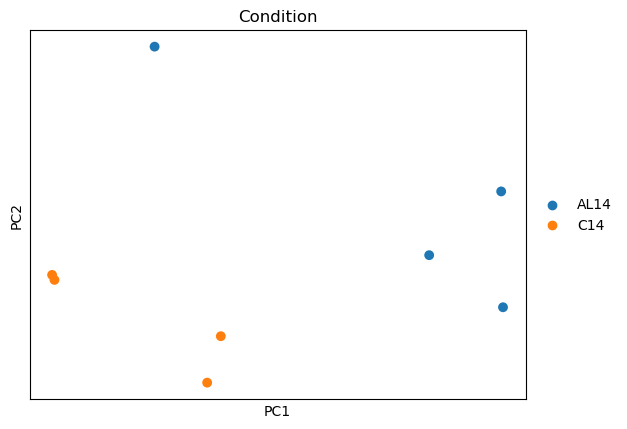

In [18]:
sc.pl.pca(dds, color = 'Condition', size = 200)

In [19]:
dds

AnnData object with n_obs × n_vars = 8 × 33915
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [20]:
stat_res = DeseqStats(dds, inference=inference, contrast = ('Condition','AL14','C14'))

In [21]:
stat_res.summary()

Running Wald tests...
... done in 7.84 seconds.



Log2 fold change & Wald test p-value: Condition AL14 vs C14
              baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
Geneid                                                                        
LOC100808170  0.112540       -0.718532  3.869168 -0.185707  0.852674       NaN
LOC102661143  1.569582       -0.668850  1.068539 -0.625948  0.531349       NaN
LOC100781438  3.127349       -0.137539  0.677170 -0.203109  0.839050       NaN
LOC100788220  2.837997       -0.277407  0.720878 -0.384818  0.700372       NaN
LOC100779643  5.239583        0.837368  0.766545  1.092392  0.274661  0.798718
...                ...             ...       ...       ...       ...       ...
I638_mgt016   0.091379        0.724152  3.869211  0.187158  0.851537       NaN
I638_mgp018   1.597581        0.217005  1.017727  0.213225  0.831152       NaN
I638_mgp014   0.158557        0.724151  2.156253  0.335838  0.736993       NaN
I638_mgp009   0.501395       -0.018590  1.539053 -0.012079  0.990363   

In [22]:
res = stat_res.results_df
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
LOC100808170,0.112540,-0.718532,3.869168,-0.185707,0.852674,NaN
LOC102661143,1.569582,-0.668850,1.068539,-0.625948,0.531349,NaN
LOC100781438,3.127349,-0.137539,0.677170,-0.203109,0.839050,NaN
LOC100788220,2.837997,-0.277407,0.720878,-0.384818,0.700372,NaN
LOC100779643,5.239583,0.837368,0.766545,1.092392,0.274661,0.798718
...,...,...,...,...,...,...
I638_mgt016,0.091379,0.724152,3.869211,0.187158,0.851537,NaN
I638_mgp018,1.597581,0.217005,1.017727,0.213225,0.831152,NaN
I638_mgp014,0.158557,0.724151,2.156253,0.335838,0.736993,NaN


In [23]:
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5)]
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
LOC100788024,11.375602,-2.676017,0.528332,-5.065034,4.083281e-07,0.000071
LOC100777515,353.854105,-0.878379,0.190327,-4.615095,3.929163e-06,0.000435
ALAAT2,313.102100,-1.064599,0.233440,-4.560478,5.103733e-06,0.000530
LOC100789955,28.448162,1.150585,0.306686,3.751668,1.756622e-04,0.008557
LOC100796464,4.804900,-4.214450,1.159065,-3.636079,2.768197e-04,0.012252
...,...,...,...,...,...,...
LOC100527215,18.283314,5.685211,1.599553,3.554250,3.790580e-04,0.015310
LOC100817348,112.093698,-1.529424,0.358202,-4.269721,1.957177e-05,0.001501
LOC100775473,13.974973,-1.595614,0.463728,-3.440839,5.799125e-04,0.021272


In [24]:
#Heatmap
import numpy as np
import seaborn as sns

In [25]:
dds

AnnData object with n_obs × n_vars = 8 × 33915
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [26]:
dds.layers['normed_counts']

array([[0.90031893, 0.90031893, 5.40191358, ..., 0.        , 0.        ,
        0.90031893],
       [0.        , 4.86993154, 2.92195892, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.79546924, 2.69320386, ..., 0.        , 0.89773462,
        0.        ],
       ...,
       [0.        , 0.99196514, 3.96786055, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.88237672, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 2.5369114 , 1.2684557 , ..., 1.2684557 , 1.2684557 ,
        0.        ]])

In [27]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])

In [28]:
dds.layers['log1p']

array([[0.64202173, 0.64202173, 1.85659694, ..., 0.        , 0.        ,
        0.64202173],
       [0.        , 1.76984297, 1.36659125, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.02799998, 1.30649434, ..., 0.        , 0.64066087,
        0.        ],
       ...,
       [0.        , 0.68912166, 1.60298928, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.35644752, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.26325386, 0.81909929, ..., 0.81909929, 0.81909929,
        0.        ]])

In [29]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
LOC100788024,11.375602,-2.676017,0.528332,-5.065034,4.083281e-07,0.000071
LOC100777515,353.854105,-0.878379,0.190327,-4.615095,3.929163e-06,0.000435
ALAAT2,313.102100,-1.064599,0.233440,-4.560478,5.103733e-06,0.000530
LOC100789955,28.448162,1.150585,0.306686,3.751668,1.756622e-04,0.008557
LOC100796464,4.804900,-4.214450,1.159065,-3.636079,2.768197e-04,0.012252
...,...,...,...,...,...,...
LOC100527215,18.283314,5.685211,1.599553,3.554250,3.790580e-04,0.015310
LOC100817348,112.093698,-1.529424,0.358202,-4.269721,1.957177e-05,0.001501
LOC100775473,13.974973,-1.595614,0.463728,-3.440839,5.799125e-04,0.021272


In [30]:
dds_sigs = dds[:, sigs.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 8 × 498
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

In [31]:
grapher = pd.DataFrame(dds_sigs.layers['log1p'].T,
                       index=dds_sigs.var_names, columns=dds_sigs.obs_names)

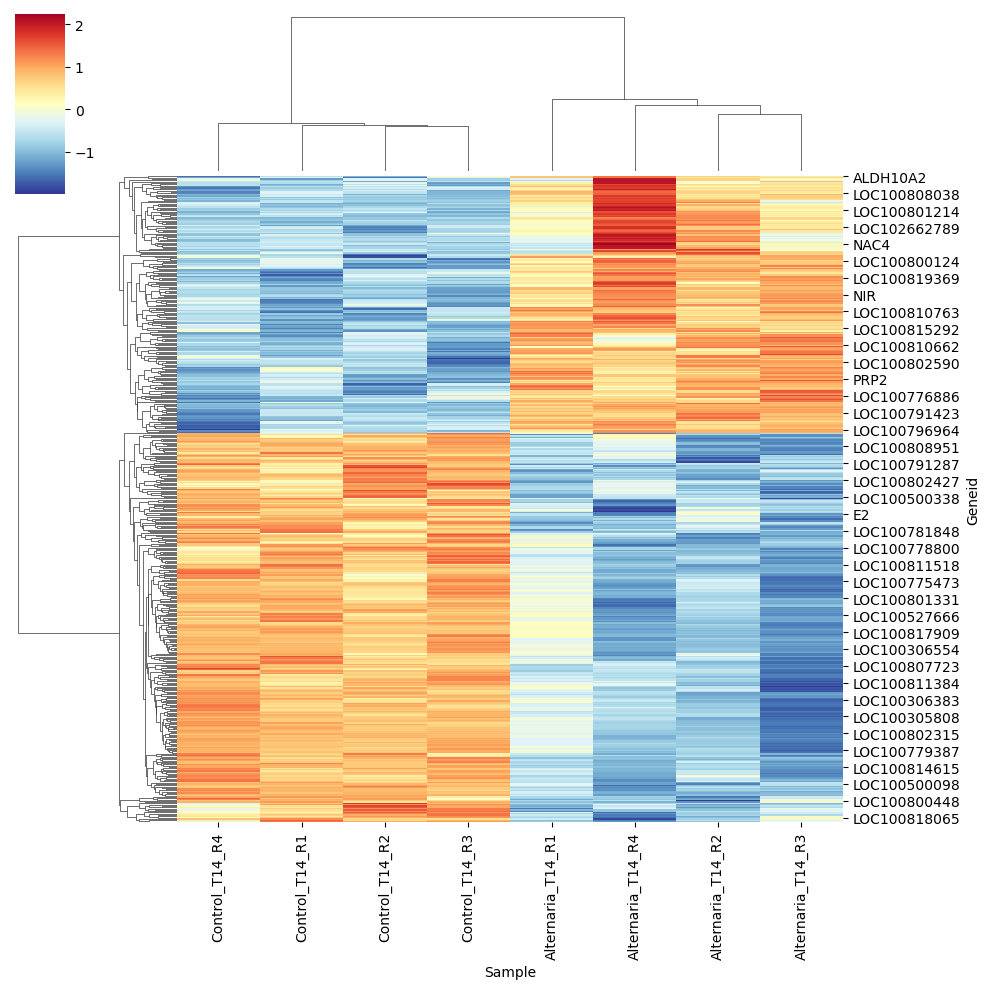

In [32]:
sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r')

In [ ]:
#Volcano

In [33]:
from bioinfokit import analys, visuz

In [34]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
LOC100788024,11.375602,-2.676017,0.528332,-5.065034,4.083281e-07,0.000071
LOC100777515,353.854105,-0.878379,0.190327,-4.615095,3.929163e-06,0.000435
ALAAT2,313.102100,-1.064599,0.233440,-4.560478,5.103733e-06,0.000530
LOC100789955,28.448162,1.150585,0.306686,3.751668,1.756622e-04,0.008557
LOC100796464,4.804900,-4.214450,1.159065,-3.636079,2.768197e-04,0.012252
...,...,...,...,...,...,...
LOC100527215,18.283314,5.685211,1.599553,3.554250,3.790580e-04,0.015310
LOC100817348,112.093698,-1.529424,0.358202,-4.269721,1.957177e-05,0.001501
LOC100775473,13.974973,-1.595614,0.463728,-3.440839,5.799125e-04,0.021272


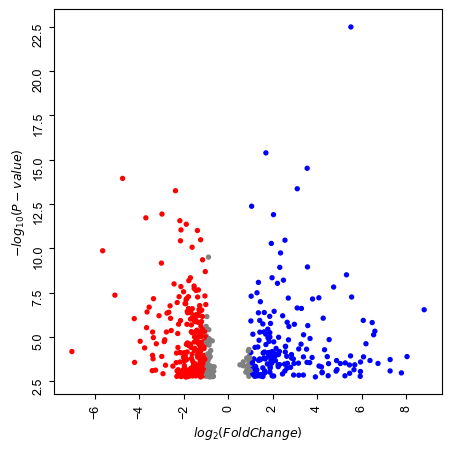

In [35]:
visuz.GeneExpression.volcano(df=sigs, lfc='log2FoldChange', pv='pvalue',
                             color=('blue','grey','red'), 
                             show=True)

In [36]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
LOC100788024,11.375602,-2.676017,0.528332,-5.065034,4.083281e-07,0.000071
LOC100777515,353.854105,-0.878379,0.190327,-4.615095,3.929163e-06,0.000435
ALAAT2,313.102100,-1.064599,0.233440,-4.560478,5.103733e-06,0.000530
LOC100789955,28.448162,1.150585,0.306686,3.751668,1.756622e-04,0.008557
LOC100796464,4.804900,-4.214450,1.159065,-3.636079,2.768197e-04,0.012252
...,...,...,...,...,...,...
LOC100527215,18.283314,5.685211,1.599553,3.554250,3.790580e-04,0.015310
LOC100817348,112.093698,-1.529424,0.358202,-4.269721,1.957177e-05,0.001501
LOC100775473,13.974973,-1.595614,0.463728,-3.440839,5.799125e-04,0.021272


In [37]:
sigs.to_csv('expressed_gene_14dpi.csv')